In [2]:
from sklearn.datasets import load_iris # 加载iris 数据集
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
print(iris.keys())   # 查看数据集中的keys
print(iris.data[0])  # 查看数据集中的 第一项数据
print(iris.data.shape)  # 查看 data的 shape属性 ， 了解data中的维度
print(iris.target)  # 查看 所有数据的target 属性
print(type(iris.target))
print(iris.target_names) # 查看taget属性的 命名
print("feature_names:",iris.feature_names) # 查看 列属性命名
print(type(iris.data)) # 查看 data属性的类型

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[5.1 3.5 1.4 0.2]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>


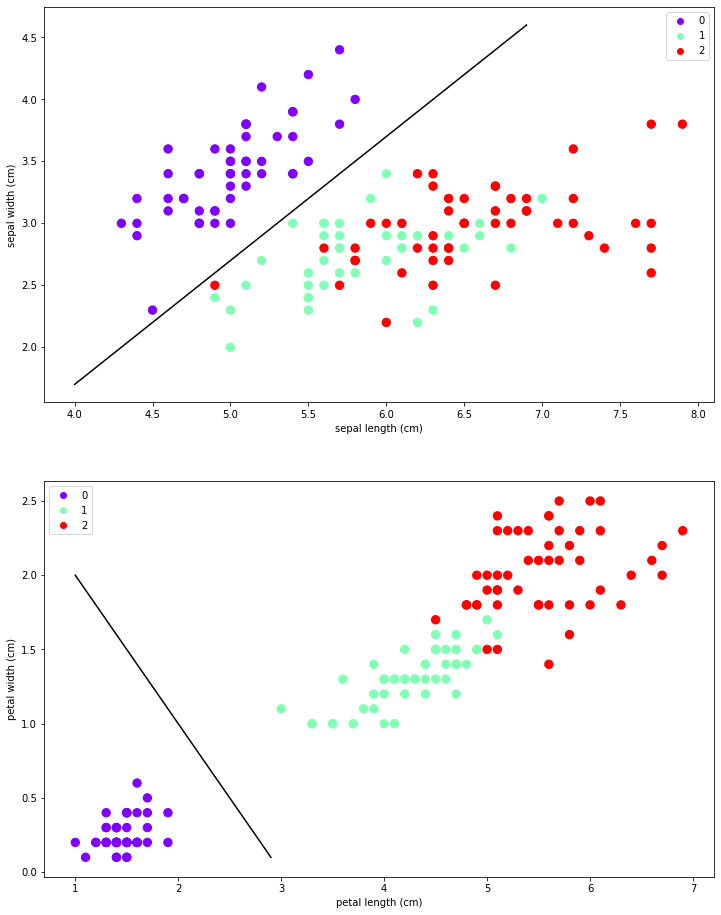

In [111]:
plt.figure(figsize = (12, 16))

cm = plt.cm.get_cmap('rainbow')  
#cm = ['r','g','b']
plt.subplot(211)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
x = iris.data[:,0]
y = iris.data[:,1]
scatter=plt.scatter(x, y, c = iris.target, s = 70, cmap = cm)
plt.legend(handles = scatter.legend_elements()[0], labels = [0,1,2]) #做出所有数据只考虑 前两个维度sepal length和sepal width的 二维点图
x = np.arange(4.0, 7.0, 0.1)
y = x - 2.3
plt.plot(x, y ,'k-') #分界线


plt.subplot(212)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
x = iris.data[:, 2]
y = iris.data[:, 3]
scatter=plt.scatter(x, y, c = iris.target, s = 70, cmap = cm)
plt.legend(handles = scatter.legend_elements()[0], labels = [0,1,2]) #做出所有数据只考虑 后两个维度petal length和petal width的 二维点图
x = np.arange(1, 3, 0.1)
y = -x + 3
plt.plot(x, y ,'k-')
plt.show()  

In [133]:
def Med(Iris_linear):
    np.random.shuffle(Iris_linear)  # 随机 打乱数据集， 取出前 70% 作为训练集 剩下 作为 测试集
    n = len(Iris_linear)
    Div_line = int(n*0.7) # 求出 训练集和 测试集的分界线
    M = np.zeros([2,4])
    cnt = [0,0]
    for i in range(Div_line):
        c = int(Iris_linear[i][4])
        M[c]+= Iris_linear[i,0:4]
        cnt[c] += 1
    m = np.zeros([2,4])
    for i in range(2):
        if(cnt[i]>0):
            m[i] = M[i]/cnt[i] # 计算每一列的均值，既 类的均值
    print("Med 分类器:")
    print(m) # 输出 med分类器
    TP = TN = FP = FN = 0
    for i in range(Div_line, n): # 测试集
        d = [0,0]
        for j in range(2):
            d[j] = np.sqrt(np.sum(np.square(m[j] - Iris_linear[i,0:4]))) # 求 数据 与 med各类均值的 欧拉距离
        if(d[0] < d[1]):
            if(Iris_linear[i][4]==0):
                TP += 1
            else:
                FP += 1
        elif(Iris_linear[i][4]==1):
                TN += 1
        else: 
                FN += 1
    Acc = (TP + TN)/(TP + TN + FP + FN)  # 准确度
    Pre = TP/(TP + FP) # 精度
    Recall = TP / (TP + FN) # 召回率
    F1_Score = 2 * Pre * Recall / (Pre + Recall)
    print("Accuracy = %.2f%% \nPrecision = %.2f%%" % (Acc*100.0, Pre*100.0))
    print("Recall = %.2f%% \nF1_Score = %.2f%%" % (Acc*100.0, Pre*100.0))
    
lr = list()
for i in range(150):
    if(iris.target[i] <= 1):
        lr.append(np.append(iris.data[i],iris.target[i]))
Iris_linear = np.array(lr)   # 取出 线性无关的 两组
#print(Iris_linear)
Med(Iris_linear) # 训练med 分类器

Med 分类器:
[[4.99473684 3.44210526 1.43947368 0.25526316]
 [5.9375     2.803125   4.290625   1.340625  ]]
Accuracy = 100.00% 
Precision = 100.00%
Recall = 100.00% 
F1_Score = 100.00%


特征值的对角化:
[[4.22824171 0.         0.         0.        ]
 [0.         0.24267075 0.         0.        ]
 [0.         0.         0.0782095  0.        ]
 [0.         0.         0.         0.02383509]]
正交白化映射矩阵:
[[ 0.1757487  -0.0411048   0.4166141   0.17424239]
 [-1.33286062 -1.48221149  0.35194265  0.15322479]
 [-2.08120809  2.1379949   0.27260309  1.95177067]
 [ 2.04349373 -2.07093084 -3.10804363  4.88163784]]


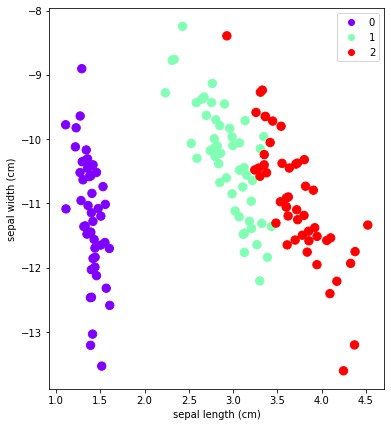

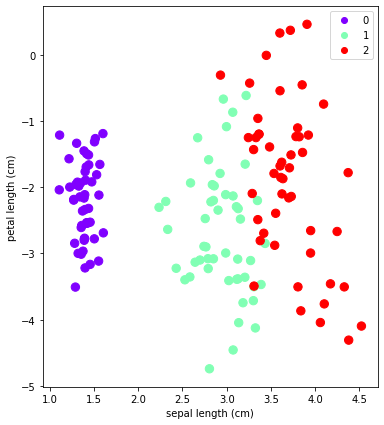

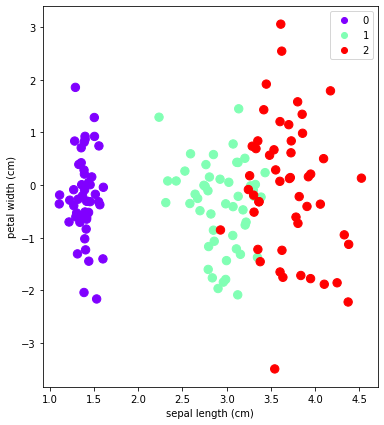

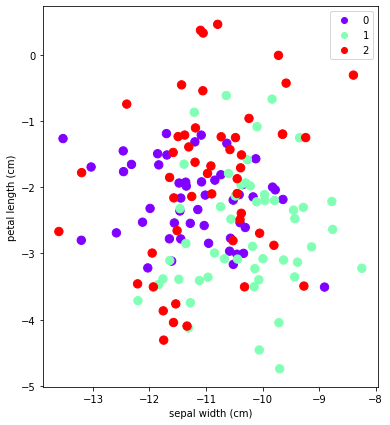

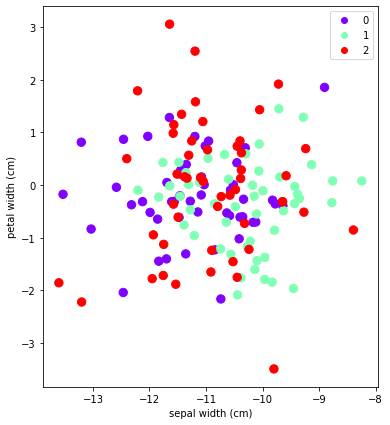

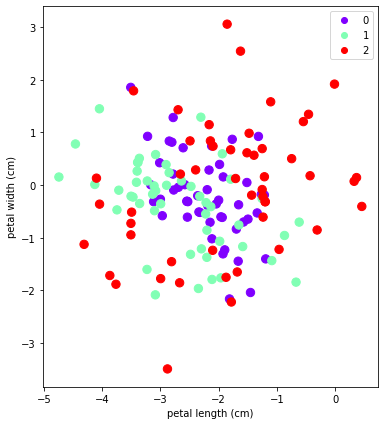

In [246]:
def show(nameX, X, nameY, Y, Z):
    plt.figure(figsize = (6, 7))
    cm = plt.cm.get_cmap('rainbow')  
    #cm = ['r','g','b']
    plt.xlabel(nameX)
    plt.ylabel(nameY)
    scatter=plt.scatter(X, Y, c = Z, s = 70, cmap = cm)
    plt.legend(handles = scatter.legend_elements()[0], labels = [0,1,2]) #做出所有数据只考虑 前两个维度sepal length和sepal width的 二维点图
    plt.show()
import math
#iris_Whitening = np.copy(iris.data)
Ex = np.cov(iris.data,rowvar=False) # 求 协方差矩阵

eigenvalue,featurevector=np.linalg.eig(Ex) # 求 特征向量
phi = np.copy(featurevector)
W1 = np.array(phi).T # W1 = 特征向量的转置
d = np.diag(eigenvalue)  # d = 特征值的对角化
print("特征值的对角化:")
print(d)
for i in range(4):
    d[i][i] = math.sqrt(d[i][i])  # 对角矩阵求 A^(1/2) 可以直接对 元素开根号
W2 = np.linalg.inv(d)  # 求出W2
W = np.matmul(W2, W1) # W = W2 * W1
print("正交白化映射矩阵:")
print(W)
iris_Whitening = np.matmul(W, iris.data.T).T # 特征值正交白化
for i in range(0,4):
    for j in range(i+1, 4):
        show(iris.feature_names[i], iris_Whitening[:,i],iris.feature_names[j], iris_Whitening[:,j], iris.target) #  枚举x ,y 做出图像

In [242]:
from scipy.cluster.vq import whiten
from scipy.linalg import fractional_matrix_power
from sklearn.preprocessing import normalize
X_whiten = whiten(iris.data) # WTF?

def my_whiten(data):
    cov = np.cov(data,rowvar=False)
    d, V = np.linalg.eigh(cov)
    W2 = fractional_matrix_power(np.diag(d), -0.5)
    print(W2)
    W = np.dot(fractional_matrix_power(np.diag(d), -0.5), V.T)
    print(W)
    X_w = np.dot(W, data.T).T
    return X_w
X_my_whiten = my_whiten(iris.data)

[[6.47726365 0.         0.         0.        ]
 [0.         3.57577551 0.         0.        ]
 [0.         0.         2.02997779 0.        ]
 [0.         0.         0.         0.48631772]]
[[ 2.04349373 -2.07093084 -3.10804363  4.88163784]
 [ 2.08120809 -2.1379949  -0.27260309 -1.95177067]
 [ 1.33286062  1.48221149 -0.35194265 -0.15322479]
 [-0.1757487   0.0411048  -0.4166141  -0.17424239]]
